In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# prepare dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# reshape images and normalize
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32') / 255.


In [79]:
# build model
hidden_layer = 64
autoencoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28,28,1)),
            tf.keras.layers.Flatten(),
            # encode
            tf.keras.layers.Dense(hidden_layer, activation='relu',input_shape=(28*28,)),
            # decode
            tf.keras.layers.Dense(28*28, activation='sigmoid',input_shape=(hidden_layer,)),
            tf.keras.layers.Reshape((28,28,1),input_shape=(28*28,))
        ])
autoencoder.compile('adam',loss=tf.keras.losses.BinaryCrossentropy())

In [74]:
# train
autoencoder.fit(x_train, x_train,
          batch_size = 256,
          epochs = 10,
          shuffle=True,
          validation_data = (x_test,x_test)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2441 - val_loss: 0.1616
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1425 - val_loss: 0.1258
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1181 - val_loss: 0.1090
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1045 - val_loss: 0.0981
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0953 - val_loss: 0.0906
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0889 - val_loss: 0.0854
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0844 - val_loss: 0.0819
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0813 - val_loss: 0.0793
Epoch 9/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0793 - val_

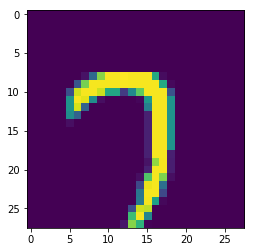

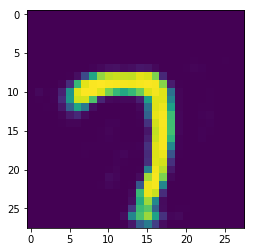

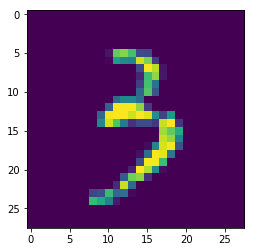

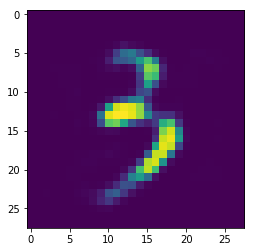

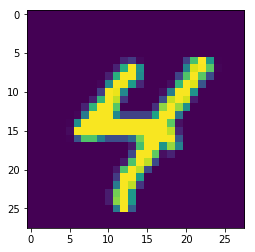

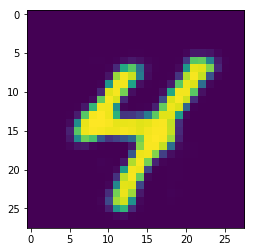

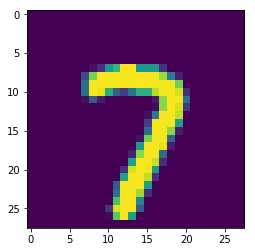

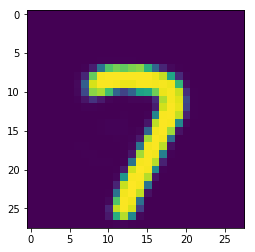

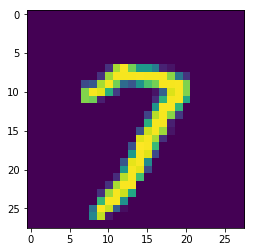

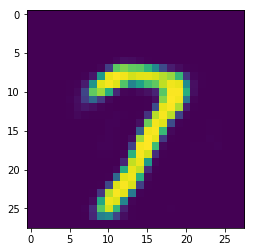

In [75]:
# test
generated = autoencoder.predict(x_test)

for i in np.random.choice(len(x_test), 5):
    real = x_test[i].reshape((28,28)) * 255.
    fake = generated[i].reshape((28,28)) * 255.
    plt.figure()
    plt.imshow(real.astype("uint8"))
    plt.figure()
    plt.imshow(fake.astype("uint8"))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1995 - val_loss: 0.1290
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1167 - val_loss: 0.1071
Epoch 3/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1042 - val_loss: 0.0997
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0981 - val_loss: 0.0958
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0944 - val_loss: 0.0924
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0917 - val_loss: 0.0898
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0897 - val_loss: 0.0888
Epoch 8/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0882 - val_loss: 0.0875
Epoch 9/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.08

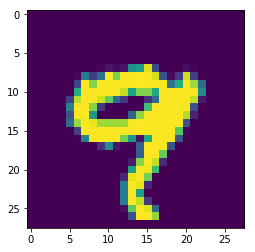

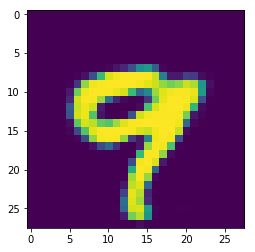

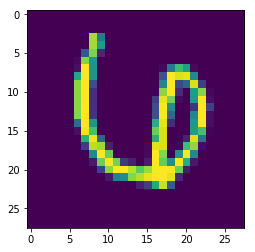

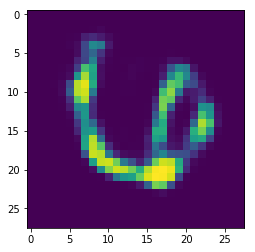

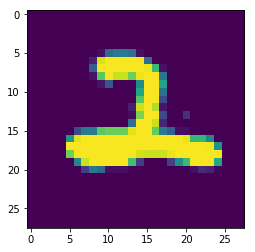

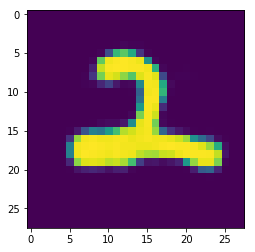

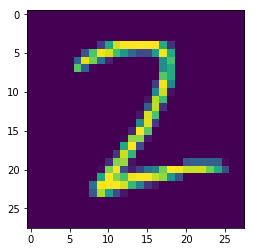

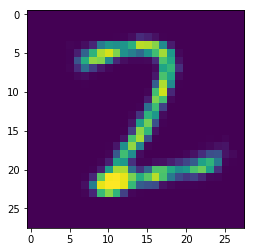

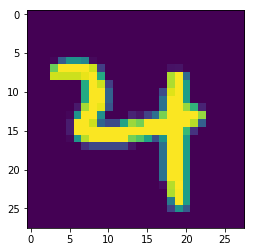

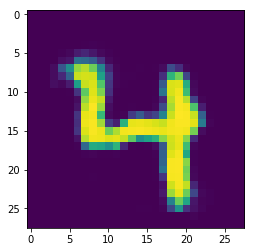

In [76]:
# deep autoencoder

deep_autoencoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28,28,1)),
            tf.keras.layers.Flatten(),
            # encode
            tf.keras.layers.Dense(512, activation='relu',input_shape=(28*28,)),
            tf.keras.layers.Dense(256, activation='relu',input_shape=(512,)),
            # sim. PCA
            tf.keras.layers.Dense(128, activation='relu',input_shape=(256,)),
            # decode
            tf.keras.layers.Dense(256, activation='relu',input_shape=(128,)),
            tf.keras.layers.Dense(512, activation='relu',input_shape=(256,)),
            tf.keras.layers.Dense(28*28, activation='sigmoid',
                                     # SPARSITY constraint
                                  activity_regularizer = tf.keras.regularizers.l1(l=0.0001),
                                  input_shape=(512,)),
            tf.keras.layers.Reshape((28,28,1),input_shape=(28*28,))
        ])

deep_autoencoder.compile('adam',loss=tf.keras.losses.BinaryCrossentropy())

deep_autoencoder.fit(x_train, x_train,
          batch_size = 256,
          epochs = 10,
          shuffle=True,
          validation_data = (x_test,x_test)
         )

generated = deep_autoencoder.predict(x_test)

for i in np.random.choice(len(x_test), 5):
    real = x_test[i].reshape((28,28)) * 255.
    fake = generated[i].reshape((28,28)) * 255.
    plt.figure()
    plt.imshow(real.astype("uint8"))
    plt.figure()
    plt.imshow(fake.astype("uint8"))